In [1]:
import os, glob, shutil
import urllib.request as r
import kaggle 

def data_yuklab_olish(saqlash_uchun_papka, data_nomi = "lentils"): 
    
    data_nomlari = ["salaries", "exams", "college", "cars", "mall", "customers", "humanitarian", 
                    "rice_leaf_disease", "lentils", "brain", "fruits", "aeroscapes", "cardiac"]
    assert data_nomi in data_nomlari, f"Mavjud bo'lgan dataset {data_nomlari} dan birini kiriting!"
    
    if data_nomi == "rice_leaf_disease": url = "kaggle datasets download -d killa92/rice-leaf-disease-classification-dataset"
    elif data_nomi == "lentils": url = "kaggle datasets download -d killa92/lentils-classification-dataset"
    elif data_nomi == "aeroscapes": url = "kaggle datasets download -d killa92/aerospaces-semantic-segmentation-dataset"
    elif data_nomi == "cardiac": url = "kaggle datasets download -d killa92/cardiac-semantic-segmentation-dataset"
    elif data_nomi == "brain": url = "kaggle datasets download -d killa92/brain-ct-tumor-classification-dataset"
    elif data_nomi == "fruits": url = "kaggle datasets download -d killa92/fruits-classification-dataset"
    
    # Download from the checkpoint path
    if os.path.isfile(f"{saqlash_uchun_papka}/{data_nomi}.csv") or os.path.isdir(f"{saqlash_uchun_papka}/{data_nomi}"): print(f"Dataset yuklab olingan. {saqlash_uchun_papka}/{data_nomi} papkasini ni tekshiring."); pass

    # If the checkpoint does not exist
    else: 
        ds_nomi = url.split("/")[-1]
        full_path = f"{saqlash_uchun_papka}/{ds_nomi}"
        print(f"{data_nomi} dataset yuklanmoqda...")
        # Download the dataset
        os.system(f"{url} -p {full_path}")
        shutil.unpack_archive(f"{full_path}/{ds_nomi}.zip", f"{saqlash_uchun_papka}/{ds_nomi}")
        os.remove(f"{full_path}/{ds_nomi}.zip")
        os.rename(f"{saqlash_uchun_papka}/{ds_nomi}", f"{saqlash_uchun_papka}/{data_nomi}")
        print(f"Tanlangan dataset {saqlash_uchun_papka}/{data_nomi} papkasiga yuklab olindi!")
    
data_yuklab_olish(saqlash_uchun_papka = "fruit_data", data_nomi = "fruits")

In [1]:
import torch, os, cv2, random
import numpy as np
from tqdm import tqdm
import pandas as pd
from glob import glob
from PIL import Image
from torchvision import transforms as T
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split


In [2]:
import os
from glob import glob
from PIL import Image
from torchvision import transforms as T
from torch.utils.data import Dataset

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root, im_type, transformations=None, type=['.png', '.jpg', '.jpeg']):
        super().__init__()
        self.root = root
        self.im_type = im_type
        self.transformations = transformations
        self.im_paths = sorted(glob(f"{root}/{im_type}/*/*.jpg"))  # Get image paths
        
        self.class_names = {}
        count = 0
        
        # Extract class names if the dataset type is specified
        if im_type in ["train", "val", "test"]:
            for idx, paths in enumerate(self.im_paths):
                class_n = self.get_data_class(paths)
                if class_n not in self.class_names:
                    self.class_names[class_n] = count
                    count += 1

    # Function to extract class name from path
    def get_data_class(self, path):
        return os.path.dirname(path).split("\\")[-1]

    def __len__(self):
        return len(self.im_paths)

    def __getitem__(self, idx):
        ims = self.im_paths[idx]
        im = Image.open(ims).convert('RGB')  # Open image
        gt = self.class_names[self.get_data_class(ims)]  # Get the ground truth label
        
        # Apply transformations if specified
        if self.transformations is not None:
            im = self.transformations(im)
        
        return im, gt

# Define mean and standard deviation for normalization
mean = [0.5652, 0.5388, 0.3994]
std = [0.2192, 0.2226, 0.2399]

# Define transformations for training and testing datasets
tr_ds_tr = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=mean, std=std)
])

ts_ds_tr = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()
])

# Create datasets for training, validation, and testing
root = "fruit_data/fruits"
tr_ds = CustomDataset(root=root, im_type="train", transformations=tr_ds_tr)
val_ds = CustomDataset(root=root, im_type="val", transformations=tr_ds_tr)
ts_ds = CustomDataset(root=root, im_type="test", transformations=ts_ds_tr)

# Get the class names
class_names_ = tr_ds.class_names

# Example usage of the dataset
tr_ds[0]  # This would give you the first image and its label

# Print the class names
print(class_names_)


{'abiu': 0,
 'acai': 1,
 'acerola': 2,
 'ackee': 3,
 'ambarella': 4,
 'apple': 5,
 'apricot': 6,
 'avocado': 7,
 'banana': 8,
 'barbadine': 9,
 'barberry': 10,
 'betel_nut': 11,
 'bitter_gourd': 12,
 'black_berry': 13,
 'black_mullberry': 14,
 'brazil_nut': 15,
 'camu_camu': 16,
 'cashew': 17,
 'cempedak': 18,
 'chenet': 19,
 'cherimoya': 20,
 'chico': 21,
 'chokeberry': 22,
 'cluster_fig': 23,
 'coconut': 24,
 'corn_kernel': 25,
 'cranberry': 26,
 'cupuacu': 27,
 'custard_apple': 28,
 'damson': 29,
 'dewberry': 30,
 'dragonfruit': 31,
 'durian': 32,
 'eggplant': 33,
 'elderberry': 34,
 'emblic': 35,
 'feijoa': 36,
 'fig': 37,
 'finger_lime': 38,
 'gooseberry': 39,
 'goumi': 40,
 'grape': 41,
 'grapefruit': 42,
 'greengage': 43,
 'grenadilla': 44,
 'guava': 45,
 'hard_kiwi': 46,
 'hawthorn': 47,
 'hog_plum': 48,
 'horned_melon': 49,
 'indian_strawberry': 50,
 'jaboticaba': 51,
 'jackfruit': 52,
 'jalapeno': 53,
 'jamaica_cherry': 54,
 'jambul': 55,
 'jocote': 56,
 'jujube': 57,
 'kaffi

In [ ]:
bs = 32
tr_dl = DataLoader(dataset = tr_ds, batch_size = bs, shuffle =True, num_workers =0)
val_dl = DataLoader(dataset = val_ds, batch_size = bs, shuffle =True, num_workers =0)
ts_dl = DataLoader(dataset = ts_ds, batch_size = 1, shuffle =False, num_workers =0)

print(len(tr_dl))
print(len(val_dl))
print(len(ts_dl))
for i , batch in enumerate(tr_dl):
    im, gt = batch
    print(gt.shape)

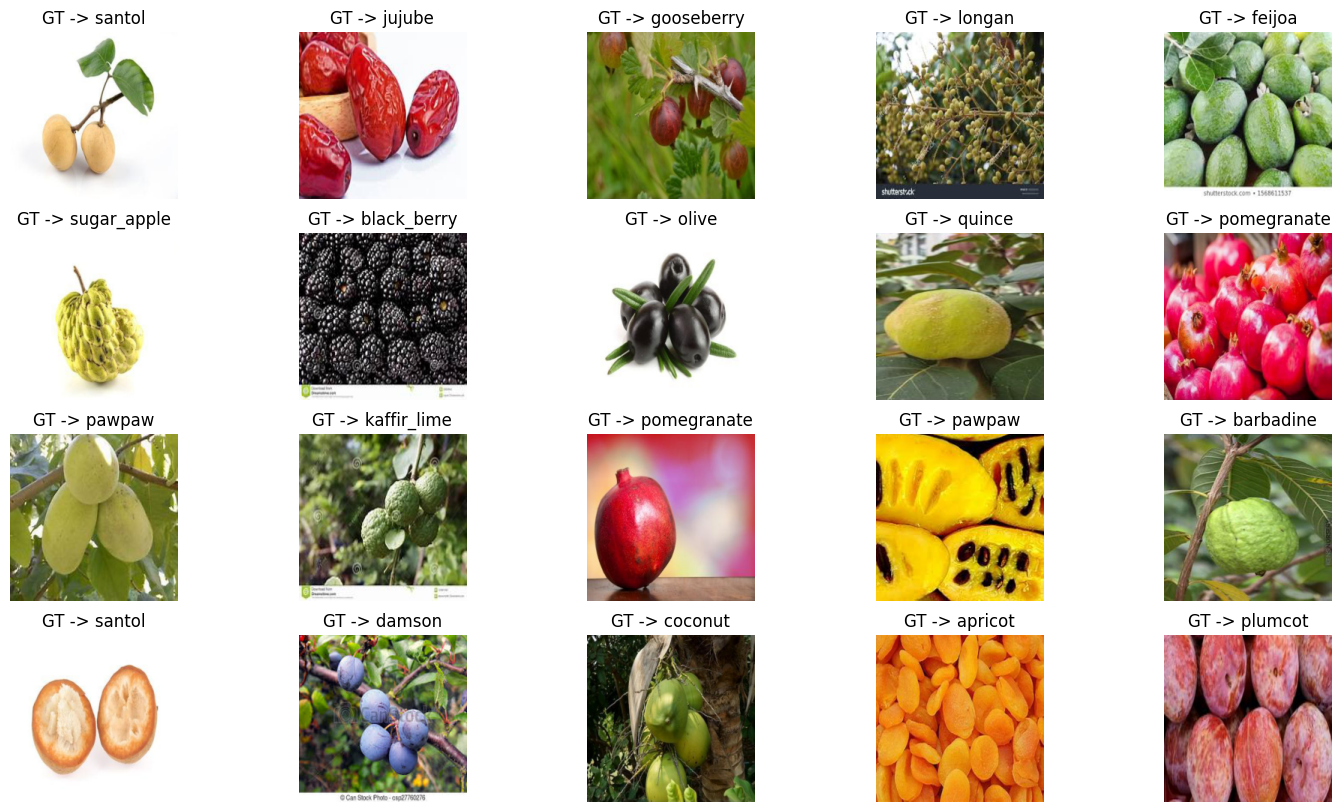

In [4]:
mean = [0.5652, 0.5388, 0.3994]
std = [0.2192, 0.2226, 0.2399]
def tn_2_im(t, t_type = "rgb"):
    gray = T.Compose([T.Normalize(mean=[0.], std=[1/5]), T.Normalize(mean = [-0.5], std=[1])])
    rgb =  T.Compose([T.Normalize(mean=[0.,0.,0.], std=[1/std[0], 1/std[1], 1/std[2]]),
                      T.Normalize(mean = [-0.5652, -0.5388, -0.3994], std=[1.,1.,1.])])
    inv_trs = gray if t_type =="gray" else rgb
    return (inv_trs(t)*255).detach().squeeze().cpu().permute(1, 2, 0).numpy().astype("uint8") if inv_trs =="gray" else (inv_trs(t)*255).detach().cpu().permute(1, 2, 0).numpy().astype("uint8") 

def visualize(data, num_im, rows, cmap =None, class_name = None):
    assert cmap in ['rgb', 'gray']
    if cmap == "rgb": cmap = "RdBu"

    plt.figure(figsize=(18, 10))
    index = [random.randint(0, len(data)-1) for _ in range(num_im)]
    for idx, indexs in enumerate(index):
        im, gt = data[indexs]
        plt.subplot(rows, num_im//rows, idx+1)
        plt.imshow(tn_2_im(im, cmap), cmap=cmap)
        plt.imshow(tn_2_im(im))
        plt.axis('off')
        plt.title(f"GT -> {class_name[gt]}")
    
visualize(data = tr_dl.dataset, num_im = 20, rows = 4, cmap ='rgb', class_name  = list(class_names_.keys()))
    

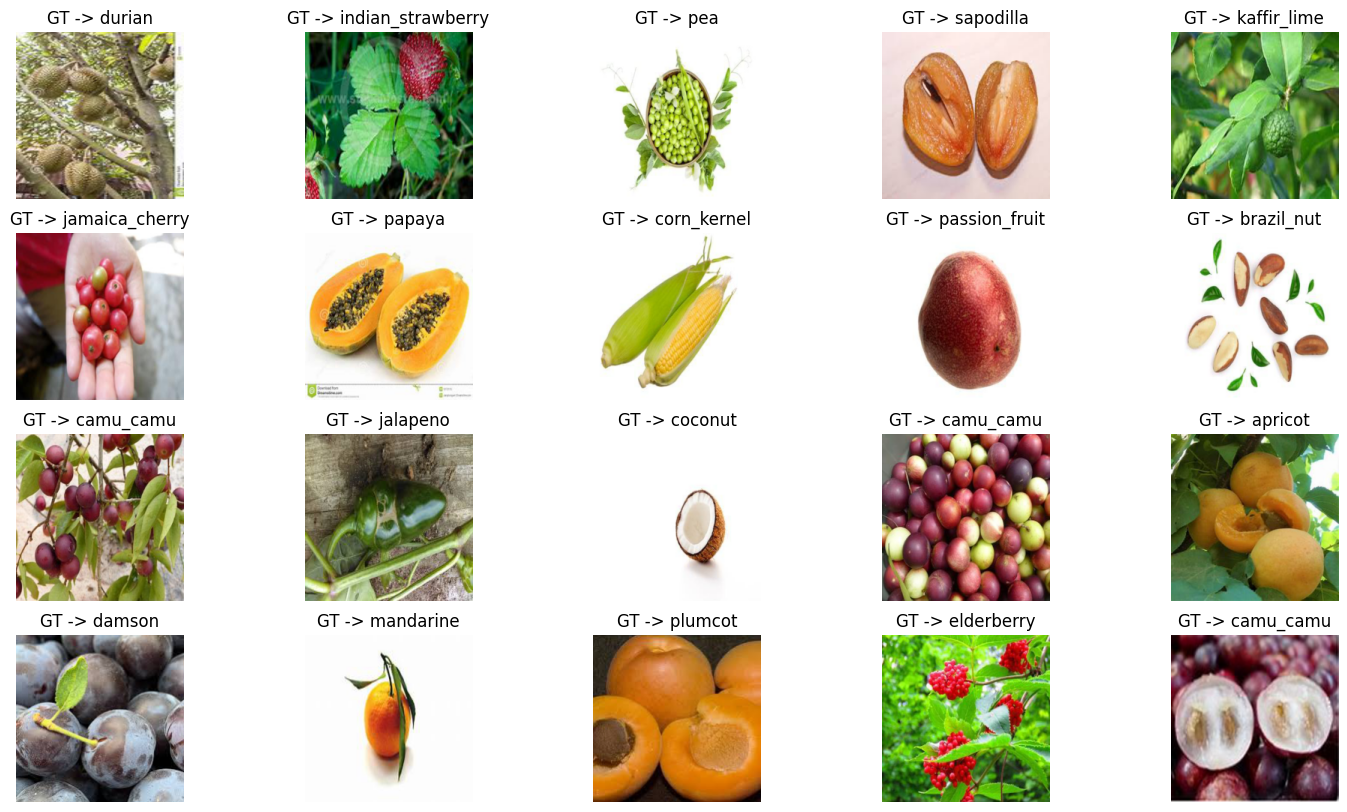

In [5]:
visualize(data = val_dl.dataset, num_im = 20, rows = 4, cmap ='rgb', class_name  = list(class_names_.keys()))


`model`

In [6]:
# Import necessary libraries
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms as T

# Create a model using timm library, in this case, rexnet_150
model = timm.create_model(model_name='rexnet_150', pretrained=True, num_classes=len(class_names_))

# Check if CUDA (GPU) is available and set the device accordingly
device = "cuda" if torch.cuda.is_available() else 'cpu'

# Define the loss function (CrossEntropyLoss in this case)
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer with a learning rate of 3e-4)
optimizer = torch.optim.Adam(params=model.parameters(), lr=3e-4)

# Move the model to the selected device (CPU or GPU)
model.to(device)


RexNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (features): Sequential(
    (0): LinearBottleneck(
      (conv_dw): ConvNormAct(
        (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
        (bn): BatchNormAct2d(
          48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
      (act_dw): ReLU6()
      (conv_pwl): ConvNormAct(
        (conv): Conv2d(48, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
    )
    (1): LinearBottlene

In [8]:
def train(model, tr_data, val_data, opt, loss_fn, device, epocs, threshold, save_prefix):
    tr_acc_sc, tr_epoc_loss, val_acc_sc, val_epoc_loss = [],[],[],[]
    best_loss = np.inf
    print("Train progress is starting ........")
    
    for epoc in range(epocs):
        print(f"{epoc+1} - epoc is starting ...")
        tr_acc, tr_loss, tr_total =0,0,0
        for idx, batch in enumerate(tqdm(tr_data)):
            im, gt = batch
            im, gt = im.to(device), gt.to(device)
            tr_total+=im.shape[0]
            # predict using the model
            pred = model(im)
            # Culculate Loss using the loss function
            loss =loss_fn(pred, gt)
            #update the training loss 
            tr_loss+=loss.item()
            # get indeces of the maximum values in the predictions 
            pred_class = torch.argmax(pred, dim =1)
            # Culculate the train accurancy scores
            tr_acc+=(pred_class==gt).sum().item()

            # preform optimizetion steps
            
            opt.zero_grad()
            loss.backward()
            opt.step()
        tr_acc /=len(tr_data.dataset)
        tr_loss /= len(tr_data)
        tr_acc_sc.append(tr_acc)
        tr_epoc_loss.append(tr_loss)

        # Validation progress
        # Set the model to evaluation mode
        model.eval()
        # Perform inference or validation without computing gradients
        with torch.no_grad():
            val_acc, val_loss, val_total =0,0,0
            for idx, batch in enumerate(tqdm(val_data)):
                im, gt = batch
                im, gt = im.to(device), gt.to(device)
                val_total+=im.shape[0]
                #predict using the model
                pred = model(im)
                # Culculate Loss using the loss function
                loss = loss_fn(pred, gt)
                # update validation loss
                val_loss+=loss.item()
                # get indeces of the maximum values in predictions
                pred_class =torch.argmax(pred, dim =1)
                # Culculate the validation accurancy scores
                val_acc+=(pred_class==gt).sum().item()
            
            val_acc /= len(val_data.dataset)
            val_loss /=len(val_data)
            val_acc_sc.append(val_acc)
            val_epoc_loss.append(val_loss)
            
            print(f"{epoc+1} - epoc Train process is results:\n")
            print(f"{epoc+1} - epoc Train Accurancy score       - > {tr_acc:.3f}")
            print(f"{epoc+1} - epoc Train epoc loss  score      - > {tr_loss:.3f}")
            print(f"{epoc+1} - epoc Validation process is results:\n")
            print(f"{epoc+1} - epoc Validation Accurancy score  - > {val_acc:.3f}")
            print(f"{epoc+1} - epoc Validation epoc loss  score - > {val_loss:.3f}")
            
            if val_loss < (best_loss + threshold):
                val_loss = best_loss
                os.makedirs("Fruits_best_model", exist_ok=True)
                torch.save(model, f"Fruits_best_model/{save_prefix}_best_model.pht")
                
    return {"tr_acc_sc": tr_acc_sc, "tr_epoc_loss": tr_epoc_loss, "val_acc_sc": val_acc_sc, "val_epoc_loss": val_epoc_loss}

result = train(model= model.to(device).eval(), tr_data =tr_dl, val_data = val_dl, opt = optimazer, 
               loss_fn = loss_fn, device =device, epocs =10, threshold = 0.001, save_prefix = "Fruits")

Train progress is starting ........
1 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:19<00:00,  8.22it/s]


1 - epoc Train process is results:

1 - epoc Train Accurancy score       - > 0.563
1 - epoc Train epoc loss  score      - > 1.628
1 - epoc Validation process is results:

1 - epoc Validation Accurancy score  - > 0.702
1 - epoc Validation epoc loss  score - > 1.044
2 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  9.06it/s]


2 - epoc Train process is results:

2 - epoc Train Accurancy score       - > 0.765
2 - epoc Train epoc loss  score      - > 0.782
2 - epoc Validation process is results:

2 - epoc Validation Accurancy score  - > 0.763
2 - epoc Validation epoc loss  score - > 0.796
3 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  9.15it/s]


3 - epoc Train process is results:

3 - epoc Train Accurancy score       - > 0.827
3 - epoc Train epoc loss  score      - > 0.548
3 - epoc Validation process is results:

3 - epoc Validation Accurancy score  - > 0.781
3 - epoc Validation epoc loss  score - > 0.756
4 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  9.00it/s]


4 - epoc Train process is results:

4 - epoc Train Accurancy score       - > 0.862
4 - epoc Train epoc loss  score      - > 0.421
4 - epoc Validation process is results:

4 - epoc Validation Accurancy score  - > 0.789
4 - epoc Validation epoc loss  score - > 0.713
5 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  9.03it/s]


5 - epoc Train process is results:

5 - epoc Train Accurancy score       - > 0.885
5 - epoc Train epoc loss  score      - > 0.340
5 - epoc Validation process is results:

5 - epoc Validation Accurancy score  - > 0.797
5 - epoc Validation epoc loss  score - > 0.700
6 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  9.02it/s]


6 - epoc Train process is results:

6 - epoc Train Accurancy score       - > 0.900
6 - epoc Train epoc loss  score      - > 0.287
6 - epoc Validation process is results:

6 - epoc Validation Accurancy score  - > 0.785
6 - epoc Validation epoc loss  score - > 0.752
7 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:18<00:00,  8.61it/s]


7 - epoc Train process is results:

7 - epoc Train Accurancy score       - > 0.915
7 - epoc Train epoc loss  score      - > 0.242
7 - epoc Validation process is results:

7 - epoc Validation Accurancy score  - > 0.811
7 - epoc Validation epoc loss  score - > 0.728
8 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  8.94it/s]


8 - epoc Train process is results:

8 - epoc Train Accurancy score       - > 0.927
8 - epoc Train epoc loss  score      - > 0.211
8 - epoc Validation process is results:

8 - epoc Validation Accurancy score  - > 0.800
8 - epoc Validation epoc loss  score - > 0.777
9 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  8.89it/s]


9 - epoc Train process is results:

9 - epoc Train Accurancy score       - > 0.932
9 - epoc Train epoc loss  score      - > 0.192
9 - epoc Validation process is results:

9 - epoc Validation Accurancy score  - > 0.807
9 - epoc Validation epoc loss  score - > 0.752
10 - epoc is starting ...


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:17<00:00,  8.95it/s]


10 - epoc Train process is results:

10 - epoc Train Accurancy score       - > 0.942
10 - epoc Train epoc loss  score      - > 0.166
10 - epoc Validation process is results:

10 - epoc Validation Accurancy score  - > 0.805
10 - epoc Validation epoc loss  score - > 0.759


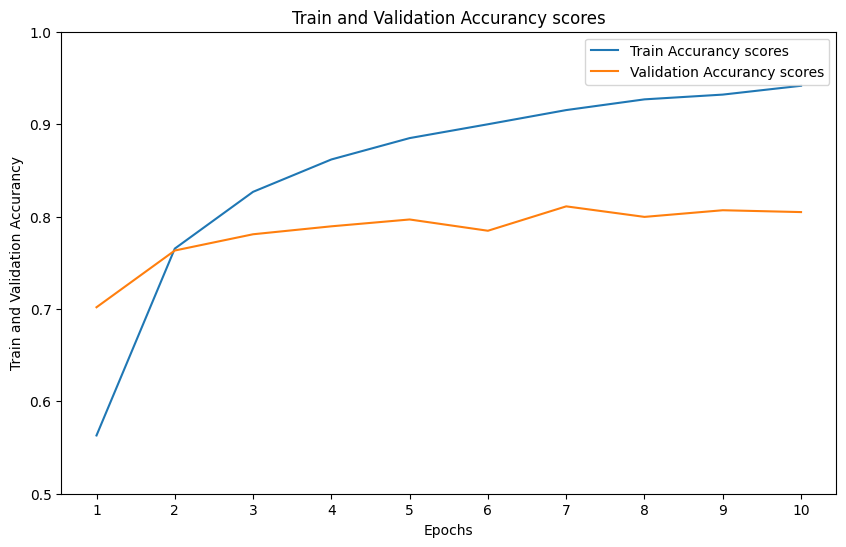

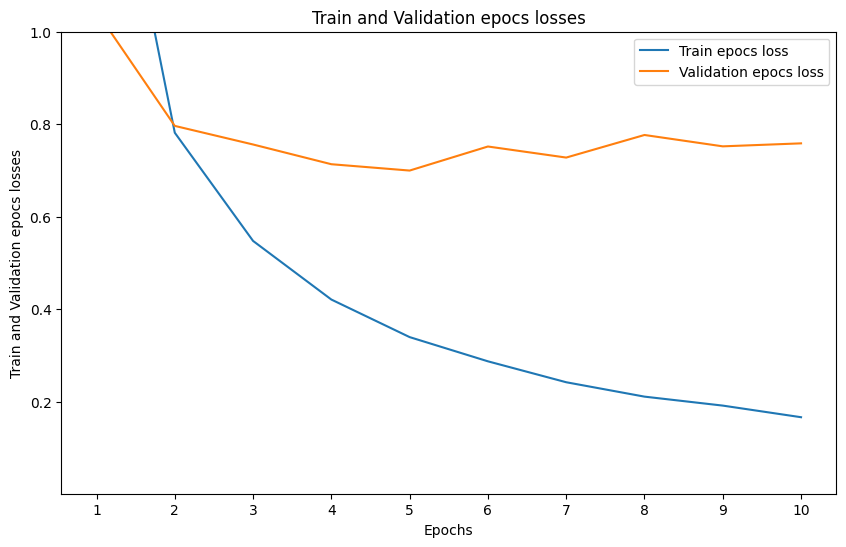

In [9]:
class plot():
    def __init__(self, r):
        plt.figure(figsize=(10, 6))
        plt.plot(r["tr_acc_sc"], label ="Train Accurancy scores")
        plt.plot(r["val_acc_sc"], label = "Validation Accurancy scores")
        plt.title("Train and Validation Accurancy scores")
        plt.xlabel("Epochs")
        plt.ylabel("Train and Validation Accurancy")
        plt.xticks(np.arange(len(r["val_acc_sc"])), [i for i in range(1, len(r["val_acc_sc"])+1)])
        plt.legend()
        plt.ylim(0.5 ,1)
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(r["tr_epoc_loss"], label ="Train epocs loss")
        plt.plot(r["val_epoc_loss"], label = "Validation epocs loss")
        plt.title("Train and Validation epocs losses")
        plt.xlabel("Epochs")
        plt.ylabel("Train and Validation epocs losses")
        plt.xticks(np.arange(len(r["val_acc_sc"])), [i for i in range(1, len(r["val_acc_sc"])+1)])
        plt.legend()
        plt.ylim(0.001 ,1)
        plt.show()
        
        
  
plot(result) 

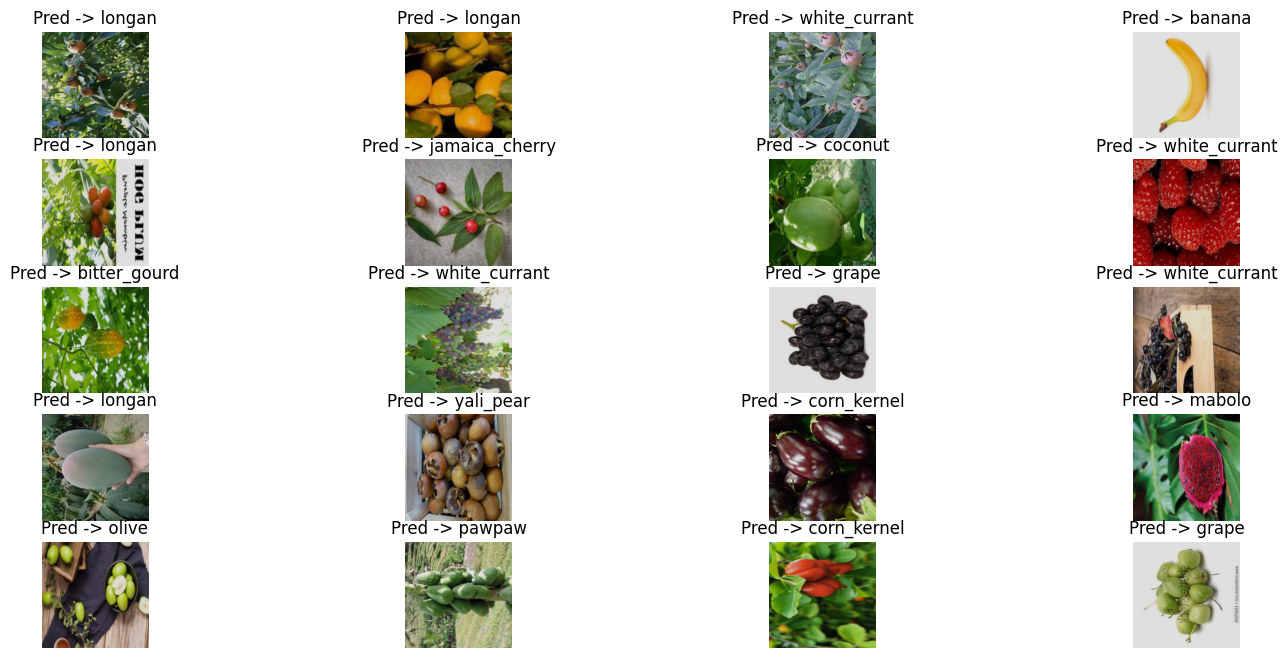

In [36]:
def inference(model, datas, device, num_images, rows, class_name):
    predictions, images =[],[]
    for idx, data in enumerate(datas):
    
        im =data[0]
        # print(im[0].shape)
        im = im.to(device)
        pred = torch.argmax(model(im[0].unsqueeze(dim=0)), dim=1)
        images.append(im)
        predictions.append(pred.item())

    index_num = [random.randint(0, len(datas)-1) for _ in range(num_images)]
    plt.figure(figsize=(18, 8))
    for idx, index in enumerate(index_num):
        im = images[index].squeeze()
        plt.subplot(rows, num_images//rows, idx+1)
        # plt.imshow(im[0].cpu() * 225).permute(2, 1, 0).numpy().astype("uint8"))
        plt.imshow((im.cpu() * 225).permute(2, 1, 0).numpy().astype("uint8"))
        plt.axis('off')
        if class_name is not None:
            plt.title(f"Pred -> {class_name[int(predictions[index])]}")
            plt.axis("off")
        else:
            plt.title(f"pred -> {predictions[index]}")
    plt.show()
model = torch.load("Fruits_best_model/Fruits_best_model.pht")
inference(model = model.to(device), datas = ts_dl, device = device, num_images = 20, rows = 5, class_name = list(class_names_.keys()))
    

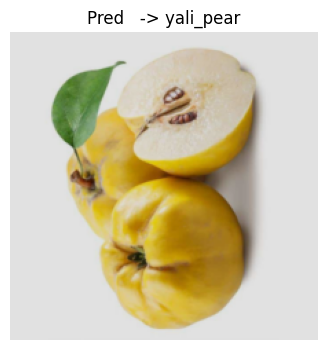

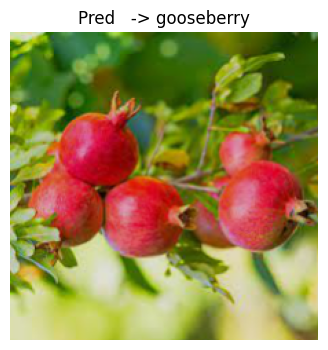

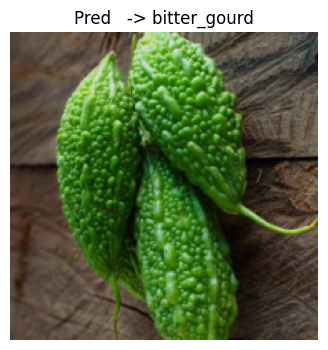

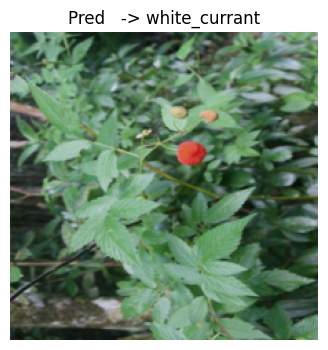

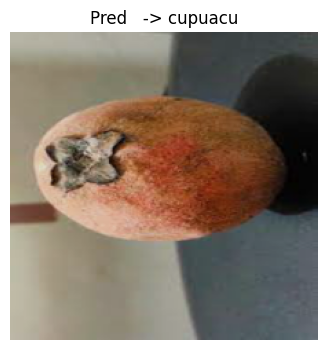

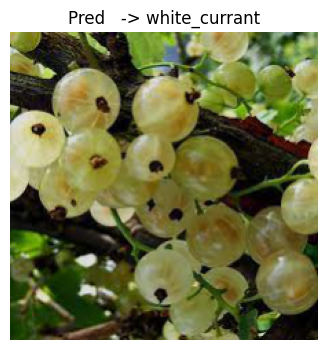

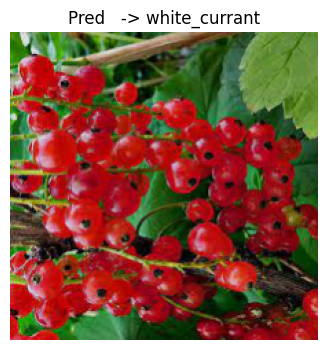

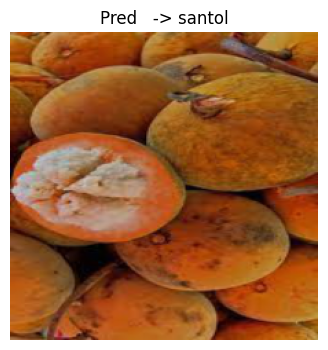

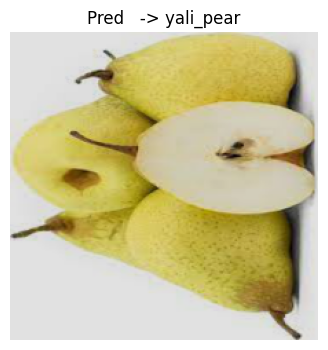

In [50]:
def process_images_predict(model, device, root, file_type =['.jpg', '.png', '.jpeg'] ):
    images, predicts = [],[]
    transformations = T.Compose([T.Resize((224, 224)),
                                T.ToTensor()])
    im_path = glob(f"{root}/*[{ i for i in file_type}]")
    for idx, path in enumerate(im_path):
        im = Image.open(path).convert("RGB")
        im_tersor = transformations(im)
        images.append(im_tersor)
        
        pred = torch.argmax(model(im_tersor.unsqueeze(dim=0).to(device)), dim=1).item()
        # print(pred)
        predicts.append(pred)

        plt.figure(figsize=(6, 4))
        
        plt.imshow((im_tersor*225).cpu().permute(2,1,0).numpy().astype("uint8"))
        plt.title(f"Pred   -> {list(class_names_.keys())[pred]}")
        plt.axis('off')
        plt.show()
root = "daa"
process_images_predict(model=model.to(device), device=device, root=root)